In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import re

In [4]:
data = pd.read_sas('c:/users/nb-0242/desktop/PHR/HN17_ALL.sas7bdat', encoding='latin-1')

# 전처리

<h3> 가중치 관련 변수 제거

In [8]:
r = re.compile('^wt_*')
wt_var = list(filter(r.match, data.columns))
wt_var

['wt_hs',
 'wt_itvex',
 'wt_pft',
 'wt_hm',
 'wt_ex1',
 'wt_ntr',
 'wt_tot',
 'wt_pfhm',
 'wt_pfnt',
 'wt_hmnt',
 'wt_pfhmnt',
 'wt_ex1nt',
 'wt_ex1hm',
 'wt_ex1pf',
 'wt_tot1',
 'wt_ex1pfnt',
 'wt_ex1hmnt',
 'wt_tot1nt']

In [9]:
train_data = data.iloc[:, ~data.columns.isin(wt_var)]

<h3> 결측치가 1000개 이상인 변수 제거하기

In [113]:
train_data_ = train_data.iloc[:, train_data.isnull().sum().values < 1000]

In [14]:
max(train_data_.isnull().sum())

964

In [26]:
train_data_.shape

(8127, 496)

In [25]:
train_data_.iloc[:, train_data_.isnull().sum().values >1].isnull().sum()

incm           28
ho_incm        28
incm5          28
ho_incm5       28
edu           798
ainc           28
D_1_1         428
D_2_1         428
D_2_wk        428
DI1_dg        428
DI1_ag        428
DI1_pr        428
DI1_pt        428
DI1_2         428
DI2_dg        428
DI2_ag        428
DI2_pr        428
DI2_pt        428
DI2_2         428
DI3_dg        428
DI3_ag        428
DI3_pr        428
DI3_pt        428
DI3_2         428
DI4_dg        766
DI4_pr        766
DI4_pt        766
DI5_dg        428
DI5_ag        428
DI5_pr        428
             ... 
N_DAY         964
N_INTK        960
N_EN          960
N_WATER       960
N_PROT        960
N_FAT         960
N_SFA         960
N_MUFA        960
N_PUFA        960
N_N3          960
N_N6          960
N_CHOL        960
N_CHO         960
N_TDF         960
N_CA          960
N_PHOS        960
N_FE          960
N_NA          960
N_K           960
N_VA          960
N_VA_RAE      960
N_CAROT       960
N_RETIN       960
N_B1          960
N_B2      

In [114]:
train_data_.dropna(axis=0, inplace= True)

c:\users\nb-0242\anaconda3\envs\ximz\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [115]:
train_data_.shape

(6400, 496)

In [116]:
train_data_.reset_index(inplace=True, drop=True)
print(train_data_.shape)
train_data_.head()

(6400, 496)


,mod_d,ID,ID_fam,year,region,town_t,apt_t,psu,sex,age,...,N_VA_RAE,N_CAROT,N_RETIN,N_B1,N_B2,N_NIAC,N_VITC,LF_secur_y,LF_BUYER,LF_safe
0,2019.01.16.,A601169401,A6011694,2017.0,1.0,1.0,1.0,A601,1.0,76.0,...,107.968989,759.925836,44.641836,1.148658,0.883505,8.357358,33.239210,1.0,1.0,2.0
1,2019.01.16.,A601177901,A6011779,2017.0,1.0,1.0,1.0,A601,1.0,39.0,...,258.086652,2716.612108,31.702310,2.037906,1.542775,20.282287,64.621705,1.0,1.0,1.0
2,2019.01.16.,A601177902,A6011779,2017.0,1.0,1.0,1.0,A601,2.0,35.0,...,163.987809,1572.307650,32.962171,1.042056,0.940837,15.316899,53.504714,1.0,1.0,1.0
3,2019.01.16.,A601177903,A6011779,2017.0,1.0,1.0,1.0,A601,1.0,1.0,...,419.057128,903.445531,343.770000,0.514549,1.266080,4.822195,91.302935,1.0,1.0,1.0
4,2019.01.16.,A601208501,A6012085,2017.0,1.0,1.0,1.0,A601,1.0,71.0,...,369.152154,1621.345842,234.040000,1.485135,1.622947,15.722913,20.956242,1.0,1.0,2.0


# MODELING

In [37]:
from sklearn.ensemble import RandomForestClassifier
import sklearn

In [38]:
wi_var = ['DC1_dg', 'DC1_ag', 'DC1_pr', 'DC1_pt']

In [83]:
idx = np.random.choice(np.arange(0,6400),size=int(len(train_data_)*0.8), replace=False)

In [117]:
del train_data_['N_DAY']

In [110]:
bad_df = train_data_.index.isin(idx)

In [118]:
train_ = train_data_[bad_df]
test_ = train_data_[~bad_df]

In [127]:
train_x = train_.iloc[:,~train_.columns.isin(wi_var)].iloc[:,4:]
train_y = train_['DC1_dg']
test_x = test_.iloc[:,~test_.columns.isin(wi_var)].iloc[:,4:]
test_y = test_['DC1_dg']

In [128]:
#조사구번호를 일단 지우기
len(set(train_['psu']))
del train_x['psu']
del test_x['psu']

In [129]:
train_x.head()

,region,town_t,apt_t,sex,age,incm,ho_incm,incm5,ho_incm5,edu,...,N_VA_RAE,N_CAROT,N_RETIN,N_B1,N_B2,N_NIAC,N_VITC,LF_secur_y,LF_BUYER,LF_safe
0,1.0,1.0,1.0,1.0,76.0,3.0,1.0,3.0,2.0,3.0,...,107.968989,759.925836,44.641836,1.148658,0.883505,8.357358,33.239210,1.0,1.0,2.0
1,1.0,1.0,1.0,1.0,39.0,1.0,2.0,2.0,3.0,3.0,...,258.086652,2716.612108,31.702310,2.037906,1.542775,20.282287,64.621705,1.0,1.0,1.0
2,1.0,1.0,1.0,2.0,35.0,1.0,2.0,2.0,3.0,4.0,...,163.987809,1572.307650,32.962171,1.042056,0.940837,15.316899,53.504714,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,3.0,1.0,...,419.057128,903.445531,343.770000,0.514549,1.266080,4.822195,91.302935,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0,71.0,2.0,2.0,3.0,2.0,1.0,...,369.152154,1621.345842,234.040000,1.485135,1.622947,15.722913,20.956242,1.0,1.0,2.0


In [98]:
rf = RandomForestClassifier(n_jobs=-1, )

In [130]:
rf.fit(train_x, train_y,)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [131]:
test_yhat = rf.predict(test_x)

In [132]:
np.sum(np.equal(test_yhat, test_y.values.reshape(-1,)))/len(test_y)

0.9921875

In [133]:
test_yhat

array([0., 0., 0., ..., 0., 8., 0.])

In [137]:
import matplotlib.pyplot as plt

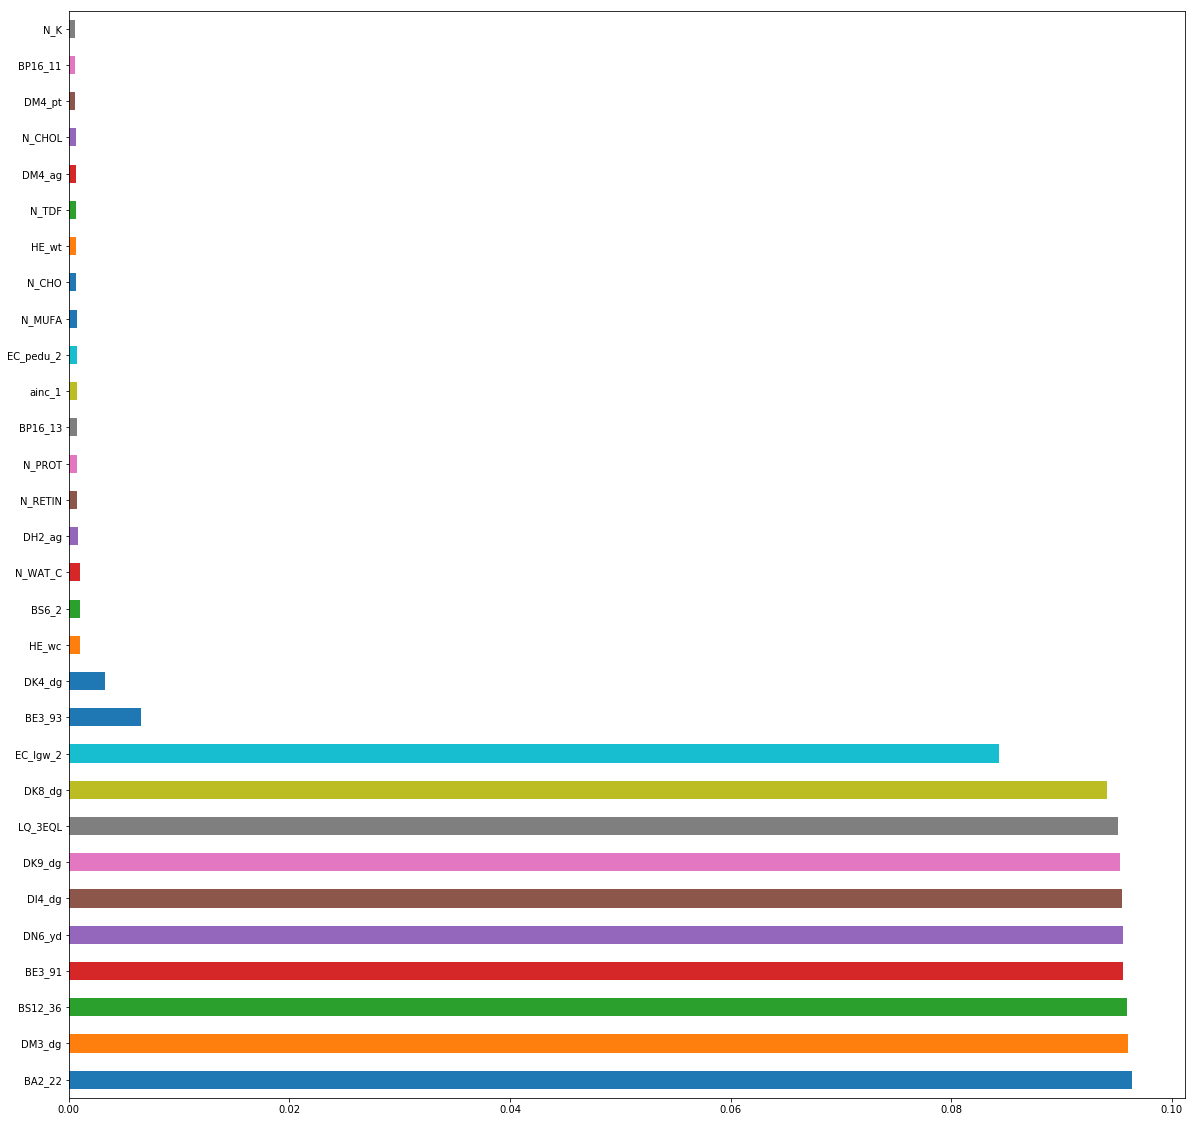

In [139]:
plt.figure(figsize=(20,20))
feat_importances = pd.Series(rf.feature_importances_, index=test_x.columns)
feat_importances.nlargest(30).plot(kind='barh')

DM3_dg : 류마티스성 관절염 의사진단 여부
BA2_22 : 1년간 음주운전차량: 동승 횟수
BS12_36 : 평생사용담배종류: 피운 적 없음
DN6_yd : (소아,청소년) 요로감염 의사진단
DI4_dg : 심근경색증 또는 협심증 의사진단 여부
DK9_dg : c형감염 의사진단 여부
LQ_3EQL : 일상활동(지장있음, 없음..)
DK8_dg : b형감염 의사진단 여부
EC_lgw_2 : (성인)
    최장일자리: 표준직업분류 
    대분류 코드+실업/비경활 상태
  
